# Center of Gravity (COG)

https://admiralmarkets.com/education/articles/forex-indicators/trading-with-the-center-of-gravity-indicator

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888065,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880951,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070839,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200


In [3]:
n = 10  # Number of periods
w = 0.5  # Weight factor
m = (n - 1) // 2
COG = df['Adj Close'].rolling(window=n).apply(lambda x: (w * (m + 1) * x[m] + w * m * x[m - 1] + (1 - w) * (m + 1) * x[m + 1] + (1 - w) * (m + 2) * x[m + 2]) / (2 * m + 3), raw=True)

df['COG'] = COG

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,COG
Date,,,,,,,
2018-01-16,44.474998,44.847500,44.035000,44.047501,41.820900,118263600,37.645045
2018-01-17,44.037498,44.812500,43.767502,44.775002,42.511623,137547200,37.677846
2018-01-18,44.842499,45.025002,44.562500,44.814999,42.549599,124773600,37.845399
2018-01-19,44.652500,44.895000,44.352501,44.615002,42.359715,129700400,37.936461
2018-01-22,44.325001,44.445000,44.150002,44.250000,42.013161,108434400,38.216656


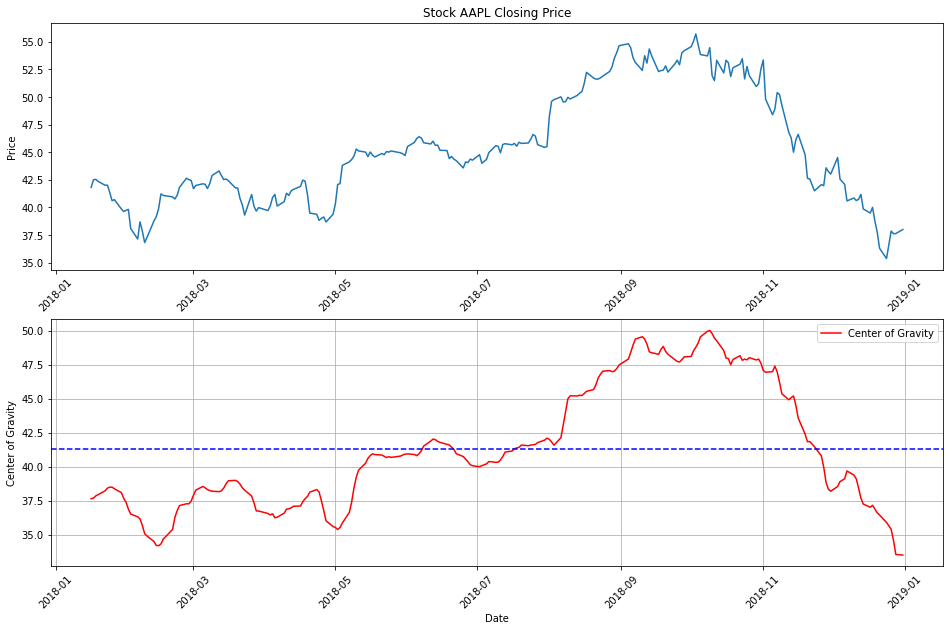

In [5]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['COG'], label='Center of Gravity', color='red')
ax2.axhline(y=df['COG'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Center of Gravity')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

## Candlestick with Center of Gravity

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,COG,VolumePositive
0,736710.0,44.474998,44.847500,44.035000,44.047501,41.820900,118263600,37.645045,False
1,736711.0,44.037498,44.812500,43.767502,44.775002,42.511623,137547200,37.677846,False
2,736712.0,44.842499,45.025002,44.562500,44.814999,42.549599,124773600,37.845399,False
3,736713.0,44.652500,44.895000,44.352501,44.615002,42.359715,129700400,37.936461,False
4,736716.0,44.325001,44.445000,44.150002,44.250000,42.013161,108434400,38.216656,False


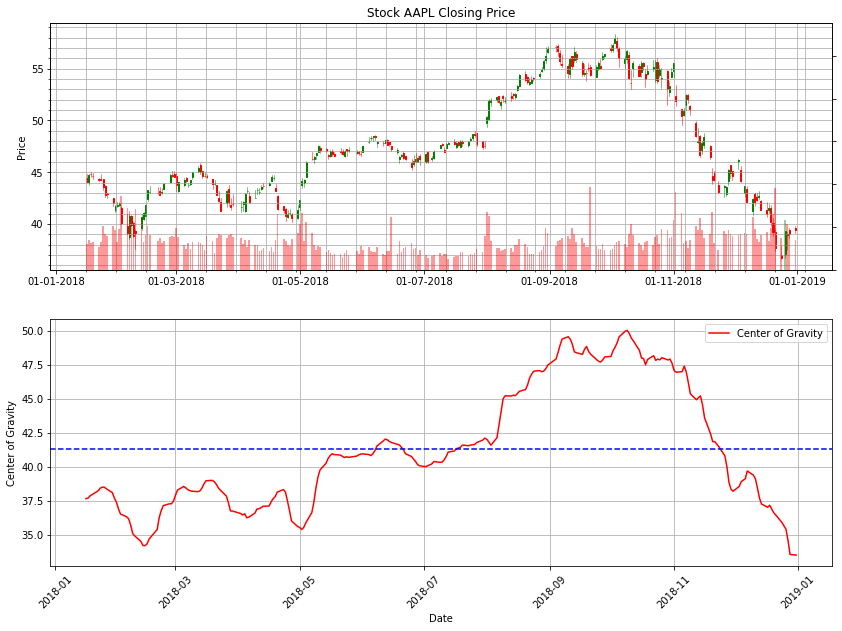

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['COG'], label='Center of Gravity', color='red')
ax2.axhline(y=df['COG'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('Center of Gravity')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')